<a href="https://colab.research.google.com/github/naqirraza99/CS-351L---AI-Lab1_2022574/blob/main/Lab%202/Lab_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:Syed Muhammad Naqi Raza**

**Registration #: 2022574**

**Lab Task: 02**

**Lab Title: Introduction to search in AI: Problem spaces, states, and goals**

**Course Title: Artificial Intelligence Lab**

**Choosen Scenario: A Way Home Game**

In the "A Way Home" game, the player (Pac-Man) starts at a home entrance ('S') and navigates through a grid maze to reach the home exit ('H'). Along the way, the player must avoid obstacles ('O') while using the A* algorithm to find the shortest path.


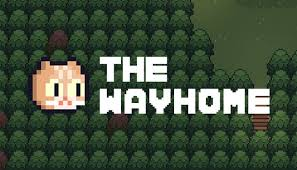

**A Way Home Game Using A* Algorithm**

In [ ]:
import heapq
import random

# Function to check if a position is valid (within bounds and not blocked by obstacles)
def is_valid_position(grid, x, y):
    """
    Check if the given position (x, y) is a valid move.
    A valid position must be within the grid and must not be an obstacle ('O').
    """
    return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 'O'

# Heuristic function for A* (Manhattan Distance)
def heuristic(a, b):
    """
    Calculate the Manhattan distance heuristic between two points a and b.
    This is used to estimate the cost of reaching the goal from the current position.
    """
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# A* Algorithm implementation
def a_star(grid, start, goal):
    """
    Implement the A* algorithm to find the shortest path from start to goal.
    The algorithm uses a priority queue to explore the nodes with the least estimated cost (f = g + h).
    """
    open_list = []  # Priority queue (open list) to explore nodes
    heapq.heappush(open_list, (0, start))  # Add the start node with priority 0

    g_score = {start: 0}  # Cost of the path from start to current node
    parent = {start: None}  # Parent dictionary to reconstruct the path

    # Directions for movement: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while open_list:
        _, current = heapq.heappop(open_list)  # Get the node with the lowest f(n)

        # If we have reached the goal, stop the search
        if current == goal:
            break

        # Explore the neighboring positions
        for direction in directions:
            next_x = current[0] + direction[0]
            next_y = current[1] + direction[1]
            next_state = (next_x, next_y)

            # Check if the next position is valid
            if is_valid_position(grid, next_x, next_y):
                tentative_g_score = g_score[current] + 1  # Cost to move to the next position

                # If the next state has not been explored or we found a cheaper path
                if next_state not in g_score or tentative_g_score < g_score[next_state]:
                    g_score[next_state] = tentative_g_score  # Update the cost
                    f_score = tentative_g_score + heuristic(next_state, goal)  # Calculate total cost (f = g + h)
                    heapq.heappush(open_list, (f_score, next_state))  # Add the state to the open list
                    parent[next_state] = current  # Set current state as the parent

    # Reconstruct the path from start to goal
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = parent[current]
    path.reverse()  # Reverse to get the path from start to goal

    return path

# Function to print the grid and path
def print_grid_with_path(grid, path):
    """
    Display the grid with the path marked using '*'.
    'S' marks the start, 'H' marks the goal (home), and 'O' marks obstacles.
    """
    grid_with_path = [row.copy() for row in grid]  # Copy the grid to avoid modifying the original
    for (x, y) in path:
        if grid_with_path[x][y] not in ['S', 'H']:  # Don't overwrite start or goal
            grid_with_path[x][y] = '*'  # Mark the path

    # Print the grid
    print("\nGrid with Path to Home:")
    print('-' * (len(grid_with_path) * 4 + 1))
    for row in grid_with_path:
        print('| ' + ' | '.join(row) + ' |')
        print('-' * (len(grid_with_path) * 4 + 1))

# Function to generate the grid with random goal (home)
def create_grid(size):
    """
    Generate a grid of the given size.
    The start position is fixed at (0, 0) and the goal (home) is placed randomly.
    """
    grid = [[' ' for _ in range(size)] for _ in range(size)]  # Create an empty grid
    goal = (random.randint(0, size - 1), random.randint(0, size - 1))  # Randomly place the home goal ('H')
    grid[goal[0]][goal[1]] = 'H'
    grid[0][0] = 'S'  # The start point is always at the top-left corner
    return grid, goal

# Function to add obstacles randomly
def add_obstacles(grid, num_obstacles):
    """
    Randomly place obstacles ('O') on the grid, ensuring they don't overlap with the start or goal.
    """
    size = len(grid)
    for _ in range(num_obstacles):
        x, y = random.randint(0, size - 1), random.randint(0, size - 1)
        if grid[x][y] == ' ':  # Place obstacle only in empty cells
            grid[x][y] = 'O'
    return grid

# Main function to play the game
def a_way_home():
    """
    The main game logic for 'A Way Home'.
    The player must find the shortest path from start ('S') to home ('H') while avoiding obstacles ('O').
    """
    print("Welcome to 'A Way Home'!")
    size = int(input("Enter the grid size (e.g., 6 for a 6x6 grid): "))
    num_obstacles = int(input(f"Enter the number of obstacles (less than {size * size - 2}): "))

    # Create the grid and add obstacles
    grid, goal = create_grid(size)
    grid = add_obstacles(grid, num_obstacles)

    # Print the initial grid
    print("\nInitial Grid (S = Start, H = Home, O = Obstacles):")
    print_grid_with_path(grid, [])

    # Start the search using the A* algorithm
    print("\nFinding the way home using A* algorithm...\n")
    path = a_star(grid, (0, 0), goal)

    # Print the final grid with the path marked
    print("\nPath to Home:")
    print_grid_with_path(grid, path)

# Run the game
a_way_home()


**Key Features and Explanation:**

**Modularity:** Each function is responsible for a specific task (e.g., a_star handles pathfinding, create_grid sets up the grid, add_obstacles adds obstacles, etc.).

**Comments:** Detailed comments explain how each part of the code works and how the A* algorithm is being used.

**Print Statements:** Clear print statements at each step show the initial grid, the process of finding the path, and the final path to the home.

**Scenario:** The game is set in a scenario where the player navigates a maze to find their way home, avoiding obstacles using the A* algorithm.

**Example Execution:**

**Welcome to 'A Way Home'!**

Enter the grid size (e.g., 6 for a 6x6 grid): 6

Enter the number of obstacles (less than 34): 5

Initial Grid (S = Start, H = Home, O = Obstacles):

| S |   |   |   |   |   |

|   |   | O |   |   |   |

|   |   |   |   |   |   |

|   | O |   |   |   |   |

|   |   |   | O |   | H |

|   |   |   |   |   |   |

Finding the way home using A* algorithm...

Path to Home:

| S | * | * |   |   |   |

|   |   | O | * |   |   |

|   |   |   | * |   |   |

|   | O |   | * |   |   |

|   |   |   | O | * | H |

|   |   |   |   |   |   |


**Program Output:**

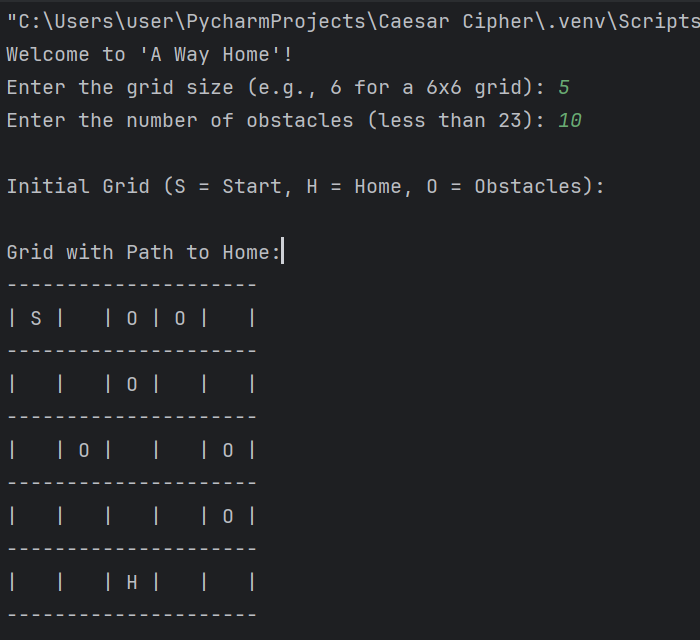

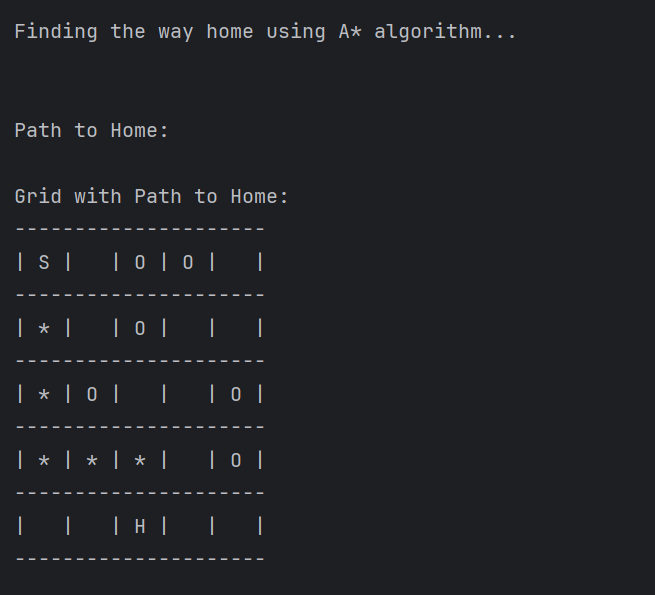